# Examen Data Science - OPI Analytics
## Alejandro Salvador Orozco Guevara

**A.2 Datos abiertos de la CDMX**

La Agencia Digital de Innovación Pública tiene disponibles los datos georeferenciados de las carpetas de investigación aportados por la PGJ. La tabla está disponible aquí: https://datos.cdmx.gob.mx/explore

In [ ]:
# Lenguaje de programación: Python.

# Se importan librerías básicas para análisis de datos.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1) ¿Qué pruebas identificarías para asegurar la calidad de estos datos? No es necesario
hacerlas. Solo describe la prueba y qué te dice cada una.

*R: Primero evaluaría la confiabilidad de la fuente. En este caso los datos provienen de un repositorio oficial del gobierno, por lo que es posible asumir que son fidedignos. Aunque dicha asunción puede no ser del todo cierta, es poco probable que exista una mejor fuente; ¿quién tendrá mejores datos sobre las carpetas de investigación que el organismo público directamente involucrado? Después haría una inspección rápida para ver si hay registros vacíos o duplicados, campos no significativos, valores de tipo incorrecto, etc.*

2.a) ¿Cuántos delitos registrados hay en la tabla? 

In [ ]:
# Se obtiene el dataset previamente descargado de la fuente, y se muestran los primeros registros.
df = pd.read_csv('carpetas-de-investigacion-pgj-de-la-ciudad-de-mexico.csv')
df.head()

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
0,2017.0,Septiembre,2017-09-30 23:00:00,ROBO A NEGOCIO CON VIOLENCIA,ROBO A NEGOCIO CON VIOLENCIA,INVESTIGACIÓN EN CUAUHTEMOC,CUH-2,UI-2CD,CUAUHTEMOC,JUÁREZ,2017,Octubre,2017-10-01 00:12:26,VERSALLES Y MARSELLA,NaN,-99.155905,19.426970,"19.426970385,-99.1559051339"
1,2017.0,Septiembre,2017-09-30 22:00:00,DAÑO EN PROPIEDAD AJENA CULPOSA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-2,UI-2CD,GUSTAVO A MADERO,RESIDENCIAL ACUEDUCTO DE GUADALUPE,2017,Octubre,2017-10-01 00:40:28,BRISAS,DESEMBOCADURA,-99.147345,19.525971,"19.5259710139,-99.1473450714"
2,2017.0,Agosto,2017-08-31 11:43:00,ROBO DE OBJETOS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-4,UI-2SD,IZTAPALAPA,LEYES DE REFORMA 3A SECCIÓN,2017,Octubre,2017-10-01 00:47:11,GUERRA DE REFORMA,BATALLA DE CALPULALPAN,-99.068851,19.382600,"19.3825998321,-99.0688509212"
3,2017.0,Septiembre,2017-09-30 21:15:00,HOMICIDIO POR ARMA DE FUEGO,HOMICIDIO DOLOSO,INVESTIGACIÓN EN TLAHUAC,TLH-1,UI-2CD,TLAHUAC,LA HABANA,2017,Octubre,2017-10-01 00:47:53,MIGUEL HIDALGO,NaN,-98.996337,19.267774,"19.2677742376,-98.9963370068"
4,2017.0,Septiembre,2017-09-12 12:00:00,ABUSO DE CONFIANZA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-4,UI-2SD,IZTAPALAPA,REAL DEL MORAL,2017,Octubre,2017-10-01 01:03:50,FERROCARRIL DE RIO FRIO,NaN,-99.080072,19.390447,"19.3904466893,-99.0800721114"


In [ ]:
# Se imprime la forma del dataset; el primer valor corresponde al número de registros.
df.shape

(1030202, 18)

*R: El número de delitos coincide con el número de registros, por tanto, hay 1,030,202 delitos registrados en la tabla.*

2.b) ¿Qué rango de tiempo consideran los
datos?

In [ ]:
df.dropna(inplace=True) # Se eliminan los valores faltantes.
df['fecha_hechos'] = pd.to_datetime(df.fecha_hechos) # El campo 'fecha_hechos' es convertido a un objeto 'datetime'.
df.sort_values(by='fecha_hechos', inplace=True) # Los datos se ordenan según la fecha.
df # Se imprimen los datos.

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
42071,1906.0,Junio,1906-06-02 19:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-1CD,IZTAPALAPA,EL MOLINO TEZONCO,2016,Junio,2016-06-03 13:11:57,CALLE ZACAHUIZCO LT 1603 MZ 155,CUAUHTEMOC,-99.068833,19.301730,"19.3017298308,-99.0688332896"
416394,1915.0,Enero,1915-01-10 15:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN XOCHIMILCO,XO-1,UI-3CD,XOCHIMILCO,BOSQUE RESIDENCIAL DEL SUR,2016,Junio,2016-06-13 12:27:38,PROLONGACIÓN DIVISIÓN DEL NORTE,ESQ. SAN LORENZO,-99.125219,19.282765,"19.2827651109,-99.1252193122"
232810,1915.0,Septiembre,1915-09-10 10:00:00,ROBO A PASAJERO A BORDO DE METRO SIN VIOLENCIA,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,INVESTIGACIÓN EN CUAUHTEMOC,URI-CUH-2,UI-1SD,CUAUHTEMOC,CENTRO,2016,Mayo,2016-05-02 16:47:06,AV. CHAPULTEPEC,AV. NIÑOS HEROES Y CALLE BALDERAS,-99.148935,19.427542,"19.4275419998,-99.148935"
94727,1942.0,Octubre,1942-10-22 19:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN COYOACÁN,COY-1,UI-1CD,COYOACAN,PEDREGAL DE SANTO DOMINGO,2016,Mayo,2016-05-23 00:44:38,JILOTZINGO,ILAMA,-99.170861,19.329233,"19.3292329998,-99.170861"
164428,1954.0,Mayo,1954-05-04 19:54:00,TENTATIVA DE EXTORSION,DELITO DE BAJO IMPACTO,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",59,UI-3CD,TLALPAN,PEDREGAL DE SAN NICOLÁS 3A SECCIÓN,2018,Mayo,2018-05-05 20:00,SOTUTA,CREMERIA,-99.233311,19.283118,"19.2831176355,-99.2333114137"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816313,2020.0,Enero,2020-12-01 23:30:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÃCULO CON Y SIN VIOLENCIA,FISCALÃA DE INVESTIGACIÃ“N TERRITORIAL EN COY...,COY-1,UI-2CD,COYOACAN,MONTE DE PIEDAD,2020,Enero,13/01/2020 07:20,IGNACIO ZARAGOZA,ENTRE: EPSILON Y AV. MIGUEL ANGEL DE QUEVEDO,-99.174035,19.345101,"19.3451006007,-99.1740349044"
709401,2020.0,Enero,2020-12-01 23:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÃA PÃšBLICA CON Y SIN V...,FISCALÃA DE INVESTIGACIÃ“N TERRITORIAL EN GUS...,GAM-2,UI-2CD,GUSTAVO A MADERO,SAN FELIPE DE JESÃšS,2020,Enero,13/01/2020 00:50,ZACAPOAXTLA,HEROE DE NACOZARI,-99.068634,19.493499,"19.4934994494,-99.0686344911"
978794,2020.0,Enero,2020-12-01 23:40:00,"NARCOMENUDEO POSESIÃ“N CON FINES DE VENTA, COM...",DELITO DE BAJO IMPACTO,FISCALÃA DE INVESTIGACIÃ“N DEL DELITO DE NARC...,ACD,UI-2CD,IZTAPALAPA,DESARROLLO URBANO QUETZALCOATL,2020,Enero,13/01/2020 01:15,VILLA GENERAL ROCA,VILLA FRECHOS,-99.040299,19.323486,"19.32348575,-99.040299258"
816289,2020.0,Enero,2020-12-01 23:40:00,ROBO DE ACCESORIOS DE AUTO,DELITO DE BAJO IMPACTO,FISCALÃA DE INVESTIGACIÃ“N TERRITORIAL EN CUA...,CUH-2,UI-2CD,CUAUHTEMOC,GUERRERO,2020,Enero,13/01/2020 00:23,PEDRO MORENO,SOTO,-99.144287,19.441415,"19.4414148401,-99.1442870448"


*R: El primer delito registrado ocurrió el 2 de junio de 1906 a las 7 p.m., y el más reciente el 12 de enero de 2020 a las 11:50 p.m.; esas fechas y horas marcan el rango de tiempo que consideran los datos.*  

3.a) ¿Cómo se distribuye el número de delitos en la CDMX?

In [ ]:
df_delitos = df.groupby('delito').count() # Se agrupan los datos por delito y se cuenta el número de incidencias.
df_delitos # Se imprime el resultado.

,ao_hechos,mes_hechos,fecha_hechos,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
delito,,,,,,,,,,,,,,,,,
ABANDONO DE PERSONA,335,335,335,335,335,335,335,335,335,335,335,335,335,335,335,335,335
ABORTO,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122,122
ABUSO DE AUTORIDAD,1578,1578,1578,1578,1578,1578,1578,1578,1578,1578,1578,1578,1578,1578,1578,1578,1578
ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA,965,965,965,965,965,965,965,965,965,965,965,965,965,965,965,965,965
ABUSO DE CONFIANZA,4152,4152,4152,4152,4152,4152,4152,4152,4152,4152,4152,4152,4152,4152,4152,4152,4152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIOLACION EQUIPARADA Y ROBO DE VEHICULO,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
VIOLACION TUMULTUARIA,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


*R: Los números que se repiten en las columnas son las incidencias de cada delito.*

3.b) ¿Cuáles son los 5 delitos más
frecuentes?

In [ ]:
df_delitos.sort_values(by='categoria_delito', ascending=False) # Se ordenan los datos de forma descendente.

,ao_hechos,mes_hechos,fecha_hechos,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
delito,,,,,,,,,,,,,,,,,
VIOLENCIA FAMILIAR,30926,30926,30926,30926,30926,30926,30926,30926,30926,30926,30926,30926,30926,30926,30926,30926,30926
ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,30383,30383,30383,30383,30383,30383,30383,30383,30383,30383,30383,30383,30383,30383,30383,30383,30383
ROBO DE OBJETOS,25089,25089,25089,25089,25089,25089,25089,25089,25089,25089,25089,25089,25089,25089,25089,25089,25089
ROBO A NEGOCIO SIN VIOLENCIA,18990,18990,18990,18990,18990,18990,18990,18990,18990,18990,18990,18990,18990,18990,18990,18990,18990
AMENAZAS,16705,16705,16705,16705,16705,16705,16705,16705,16705,16705,16705,16705,16705,16705,16705,16705,16705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
COALICIÓN DE SERVIDORES PÚBLICOS,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ROBO DE VEHICULO ELECTRICO MOTOPATIN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
TENTATIVA DE FEMINICIDIO,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


*R: Violencia familiar, robo a transeúnte en vía pública con violencia, robo de objetos, robo a negocio sin violencia y amenazas son los cinco delitos más comunes, en ese orden.*

4) Identifica los delitos que van a la alza y a la baja en la CDMX en el último año (ten
cuidado con los delitos con pocas ocurrencias).

In [ ]:
import datetime # Se importa objeto para crear las fechas de inicio y fin de los años.

df2018 = df.copy() # Se crea un nuevo dataset para albergar los datos del año 2018.
df2018.set_index('fecha_hechos', inplace=True) # La fecha de los hechos se establece como índice.
start2018 = df2018.index.searchsorted(datetime.datetime(2018, 1, 1)) # Inicio de año.
end2018 = df2018.index.searchsorted(datetime.datetime(2019, 1, 1)) # Fin de año. 
df2018 = df2018.iloc[start2018:end2018] # Dataset con los delitos del año 2018. 
df2018 # Se imprime dataset.

,ao_hechos,mes_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
fecha_hechos,,,,,,,,,,,,,,,,,
2018-01-01 00:20:00,2018.0,Enero,LESIONES INTENCIONALES POR ARMA DE FUEGO,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,INVESTIGACIÓN EN IZTAPALAPA,IZP-9,UI-1SD,IZTAPALAPA,CITLALLI,2018,Enero,2018-01-01 05:35,SE IGNORA EL LUGAR EXACTO DE LOS HECHOS,COL. CITALLI,-99.022825,19.343467,"19.3434673527,-99.0228249317"
2018-01-01 00:30:00,2018.0,Enero,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN ÁLVARO OBREGÓN,AO-1,UI-1SD,ALVARO OBREGON,HIDALGO,2018,Enero,2018-01-30 12:07,FRENTE AL DOMICILIO UBICADO EN EL NUMERO 54 D...,HENEQUEN,-99.210352,19.399762,"19.3997617647,-99.2103523507"
2018-01-01 00:30:00,2018.0,Enero,ROBO A CASA HABITACION SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-5,UI-2CD,GUSTAVO A MADERO,EL COYOL,2018,Enero,2018-01-01 11:00,ESTACIONAMIENTO DE WALMART,AVENIDA SAN JUAN DE ARAGON,-99.096484,19.481646,"19.4816461271,-99.0964841268"
2018-01-01 01:00:00,2018.0,Enero,DAÑO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-1,UI-1SD,MIGUEL HIDALGO,POPOTLA,2018,Enero,2018-01-01 13:16,MAR CANTABRICO,POCITO,-99.182582,19.453557,"19.4535574368,-99.1825824088"
2018-01-01 01:00:00,2018.0,Enero,PERDIDA DE LA VIDA POR CAIDA,HECHO NO DELICTIVO,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-3,UI-1SD,BENITO JUAREZ,NARVARTE,2018,Enero,2018-01-01 02:08,PALENQUE,SAN BORJA,-99.153511,19.381870,"19.3818700878,-99.1535114508"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:35:00,2018.0,Diciembre,VIOLACION,VIOLACIÓN,INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS SEXU...,FDS-2,FDS-2-01,ALVARO OBREGON,ARTURO MARTÍNEZ,2019,Agosto,05/08/2019 15:03:00,ANTIGUA VIA A LA VENTA,ANTIGUA VIA A LA VENTA,-99.217530,19.385770,"19.38577,-99.21753"
2018-12-31 23:45:00,2018.0,Diciembre,ROBO A CASA HABITACION SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN BENITO JUÁREZ,BJ-5,UI-2SD,BENITO JUAREZ,ALBERT,2019,Enero,01/01/2019 00:50,PLUTARCO ELIAS CALLES 1655,ALBERT,-99.137340,19.370210,"19.37021,-99.13734"
2018-12-31 23:45:00,2018.0,Diciembre,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,JUZGADOS FAMILIARES,CJM-IZP,1 SIN DETENIDO,XOCHIMILCO,NATIVITAS,2019,Enero,01/01/2019 18:10,AUDITORIO NACIONAL,PALACIO NACIONAL,-99.011170,19.250580,"19.25058,-99.01117"


In [ ]:
df2019 = df.copy() # Se crea un nuevo dataset para albergar los datos del año 2019.
df2019.set_index('fecha_hechos', inplace=True) # La fecha de los hechos se establece como índice.
start2019 = df2019.index.searchsorted(datetime.datetime(2019, 1, 1)) # Inicio de año.
end2019 = df2019.index.searchsorted(datetime.datetime(2020, 1, 1)) # Fin de año. 
df2019 = df2019.iloc[start2019:end2019] # Dataset con los delitos del año 2019. 
df2019 # Se imprime dataset.

,ao_hechos,mes_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
fecha_hechos,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,2019.0,Enero,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,"INVESTIGACIÓN PARA LA ATENCIÓN DE NIÑOS, NIÑAS...",59,UI-3CD,LA MAGDALENA CONTRERAS,HUAYATLA,2019,Noviembre,05/11/2019 15:49:44,CALLE CERRADA DE OYAMEL,X,-99.265590,19.306550,"19.30655,-99.26559"
2019-01-01 00:00:00,2019.0,Enero,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-2,UI-1SD,MIGUEL HIDALGO,IRRIGACIÓN,2019,Enero,02/01/2019 19:59,PRESA AZUCAR,PRESA LAS PILAS,-99.209340,19.441320,"19.44132,-99.20934"
2019-01-01 00:00:00,2019.0,Enero,CONTRA EL CUMPLIMIENTO DE LA OBLIGACION ALIMEN...,DELITO DE BAJO IMPACTO,FISCALÍA DE INVESTIGACIÓN DE DELITOS COMETIDOS...,59,UI-3CD,IZTAPALAPA,GUADALUPE DEL MORAL,2020,Marzo,2020-03-10 16:03:53,CALLE JOSE LOPEZ PORTILLO,INDIRA GANDHI,-99.069508,19.372364,"19.3723641689,-99.0695084597"
2019-01-01 00:01:00,2019.0,Enero,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,JUZGADOS FAMILIARES,AEAMZO,4 SIN DETENIDO 4 S/D,IZTACALCO,AGRÍCOLA PANTITLAN,2019,Julio,12/07/2019 10:25:44,CALLE DOS,UNION,-99.066200,19.416670,"19.41667,-99.0662"
2019-01-01 00:30:00,2019.0,Enero,ROBO A CASA HABITACION SIN VIOLENCIA,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-2,UI-1SD,MIGUEL HIDALGO,TACUBA,2019,Enero,02/01/2019 15:48,GOLFO DE SIDRA,GOLFO DE SAN JORGE,-99.186470,19.454460,"19.45446,-99.18647"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:00:00,2019.0,Diciembre,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,FISCALÃA DE INVESTIGACIÃ“N DEL DELITO DE VIOL...,75BIS,3 S/D,GUSTAVO A MADERO,TEPEYAC INSURGENTES,2020,Enero,12/01/2020 12:03,AV. INSURGENTES,AV. MONTEVIDEO,-99.123761,19.487009,"19.487008807,-99.1237606593"
2019-12-31 23:00:00,2019.0,Diciembre,DAÃ‘O EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL,DELITO DE BAJO IMPACTO,FISCALÃA DE INVESTIGACIÃ“N TERRITORIAL EN COY...,COY-4,UI-3SD,COYOACAN,AJUSCO,2020,Enero,30/01/2020 14:59,REY MOCTEZUMA,MIXTECAS,-99.154118,19.326967,"19.3269670398,-99.1541176307"
2019-12-31 23:25:00,2019.0,Diciembre,ROBO A TRANSEUNTE EN VIA PUBLICA SIN VIOLENCIA,ROBO A TRANSEUNTE EN VÃA PÃšBLICA CON Y SIN V...,FISCALÃA DE INVESTIGACIÃ“N DE DELITOS COMETID...,TUR-2,UI-3SD,CUAUHTEMOC,JUÃREZ,2020,Enero,01/01/2020 11:54,COPENHAGUE,PASEO DE LA REFORMA,-99.164341,19.428454,"19.4284542889,-99.1643405921"


In [ ]:
delitos = df_delitos.index # Lista de delitos.
delitos2018 = df2018.groupby('delito').count() # Se agrupa el dataset de 2018 por delito y se cuentan las incidencias.
delitos2019 = df2019.groupby('delito').count() # Se agrupa el dataset de 2019 por delito y se cuentan las incidencias.
high = [] # Se crea una lista para almacenar los delitos a la alza.
low = [] # Se crea una lista para almacenar los delitos a la baja. 
# El siguiente código compara el número de incidencias de cada delito en 2019 y 2018,
# y los asigna a las listas de alza o baja dependiendo de la comparación.
# Si un elemento en la lista de delitos no se encuentra en los delitos de 2019, se asigna a la lista de baja.
# Si hay un tipo de delito nuevo en 2019 respecto a 2018, se asigna a lista de alza.
for delito in delitos:
  if delito in delitos2019.index:
    if delito in delitos2018.index:
      if delitos2019.at[delito, 'categoria_delito'] > delitos2018.at[delito, 'categoria_delito']:
        high.append(delito)
      elif delitos2019.at[delito, 'categoria_delito'] < delitos2018.at[delito, 'categoria_delito']:
        low.append(delito)
    else:
      high.append(delito)
  else:
    low.append(delito)

In [ ]:
# R: Se imprimen los delitos a la alza en 2019 respecto a 2018.
for delito in high:
  print(delito)

ABORTO
ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA
ABUSO SEXUAL
ACOSO SEXUAL
ACOSO SEXUAL AGRAVADO EN CONTRA DE MENORES
ALLANAMIENTO DE MORADA, DESPACHO, OFICINA O ESTABLECIMIENTO MERCANTIL
AMENAZAS
ATAQUE A LAS VIAS GENERALES DE COMUNICACIÃ“N
ATAQUE A LAS VIAS GENERALES DE COMUNICACIÓN
ATAQUES A LA PAZ PUBLICA
COALICIÓN DE SERVIDORES PÚBLICOS
COBRANZA ILEGITIMA
COHECHO
CONTRA EL CUMPLIMIENTO DE LA OBLIGACION ALIMENTARIA
CONTRA LA INTIMIDAD SEXUAL
CORRUPCIÃ“N DE PERSONAS MENORES DE EDAD O PERSONAS QUE NO TENGAN CAPACIDAD PARA COMPRENDER EL SIGNIFICADO DEL HECHO O DE PERSONAS QUE NO TENGAN CAPACIDAD DE RESISTIR LA CONDUCTA
CORRUPCIÓN DE PERSONAS MENORES DE EDAD O PERSONAS QUE NO TENGAN CAPACIDAD PARA COMPRENDER EL SIGNIFICADO DEL HECHO O DE PERSONAS QUE NO TENGAN CAPACIDAD DE RESISTIR LA CONDUCTA
DAÃ‘O EN PROPIEDAD AJENA CULPOSA
DAÃ‘O EN PROPIEDAD AJENA CULPOSA POR TRÃNSITO VEHICULAR A AUTOMOVIL
DAÃ‘O EN PROPIEDAD AJENA CULPOSA POR TRÃNSITO VEHICULAR A BIENES INMUEBLES
DAÃ‘O 

In [ ]:
# R: Se imprimen los delitos a la baja en 2019 respecto a 2018.
for delito in low:
  print(delito)

ABANDONO DE PERSONA
ABUSO DE AUTORIDAD
ABUSO DE CONFIANZA
ALLANAMIENTO DE MORADA
ATAQUE A LAS VIAS DE COMUNICACION (DAÃ‘O A VIAS O MEDIOS DE TRANSPORTE)
ATAQUE A LAS VIAS DE COMUNICACION (DAÑO A VIAS O MEDIOS DE TRANSPORTE)
BIGAMIA
COACCION DE SERVIDORES PUBLICOS
CONTAMINACIÓN O RESIDUOS
CONTRA EL ESTADO CIVIL
CONTRA FUNCIONARIOS PUBLICOS
CORRUPCION DE MENORES
CORRUPCION DE MENORES E INCAPACES
DAÃ‘O EN PROPIEDAD AJENA INTENCIONAL A NEGOCIO
DAÑO EN PROPIEDAD AJENA CULPOSA
DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A BIENES INMUEBLES
DAÑO EN PROPIEDAD AJENA INTENCIONAL
DAÑO EN PROPIEDAD AJENA INTENCIONAL A VIAS DE COMUNICACION
DAÑO SUELO (ACTIVIDAD, INVASIÓN O EXTRACCIÓN)
DELITOS AMBIENTALES
DELITOS DE ABOGADOS PATRONOS Y LITIGANTES
DELITOS ELECTORALES
DENUNCIA DE HECHOS
DESOBEDENCIA DE PARTICULARES
DIFAMACION
EJERCICIO ABUSIVO DE FUNCIONES
EJERCICIO INDEBIDO DEL SERVIDOR PUBLICO
ENCUBRIMIENTO
ENCUBRIMIENTO POR FAVORECIMIENTO
ENRIQUECIMIENTO ILICITO
ENTREGA ILEGITIMA DE UN ME

5) ¿Cuál es la alcaldía que más delitos tiene y cuál es la que menos? ¿Por qué crees que sea esto?

In [ ]:
df_alcaldias = df.groupby('alcaldia_hechos').count() # Se agrupan los datos por alcaldía y se cuenta el número de casos.
df_alcaldias.sort_values(by='categoria_delito', ascending=False) # Se ordenan los datos de forma descendente.

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
alcaldia_hechos,,,,,,,,,,,,,,,,,
CUAUHTEMOC,61032,61032,61032,61032,61032,61032,61032,61032,61032,61032,61032,61032,61032,61032,61032,61032,61032
IZTAPALAPA,59477,59477,59477,59477,59477,59477,59477,59477,59477,59477,59477,59477,59477,59477,59477,59477,59477
GUSTAVO A MADERO,52145,52145,52145,52145,52145,52145,52145,52145,52145,52145,52145,52145,52145,52145,52145,52145,52145
BENITO JUAREZ,34876,34876,34876,34876,34876,34876,34876,34876,34876,34876,34876,34876,34876,34876,34876,34876,34876
COYOACAN,27183,27183,27183,27183,27183,27183,27183,27183,27183,27183,27183,27183,27183,27183,27183,27183,27183
MIGUEL HIDALGO,25003,25003,25003,25003,25003,25003,25003,25003,25003,25003,25003,25003,25003,25003,25003,25003,25003
VENUSTIANO CARRANZA,23503,23503,23503,23503,23503,23503,23503,23503,23503,23503,23503,23503,23503,23503,23503,23503,23503
IZTACALCO,19752,19752,19752,19752,19752,19752,19752,19752,19752,19752,19752,19752,19752,19752,19752,19752,19752
ALVARO OBREGON,18637,18637,18637,18637,18637,18637,18637,18637,18637,18637,18637,18637,18637,18637,18637,18637,18637


*R: La alcaldía con más delitos es Cuauhtémoc, y la que tiene menos es Milpa Alta. Observando en Google Maps me di cuenta de que Cuauhtémoc corresponde al centro de la ciudad, un lugar de alta concurrencia y poca familiaridad. Algunos criminales, como los ladrones, suelen buscar este tipo de zonas para disponer de víctimas con las que no tengan relación. La alcaldía con menos crímenes parece ser algo remota, y probablemente la mayoría de la gente se conozca ahí, lo cual dificulta crímenes del tipo sugerido.*

6) Dentro de cada alcaldía, ¿cuáles son las tres colonias con más delitos?

In [ ]:
alcaldias = df_alcaldias.index # Nombres de las alcaldías.
# El siguiente código cuenta para cada colonia de cada alcaldía el número de delitos,
# las ordena de mayor a menor, e imprime los tres primeros registros (nombre de la colonia y número de delitos).
for alcaldia in alcaldias:
  print('')
  print('Alcaldía - ', alcaldia, ': ')
  print('')
  print(' ', df.where(df['alcaldia_hechos'] == alcaldia).
             groupby('colonia_hechos').count().sort_values('mes_hechos', ascending=False).
                rename(columns={'delito':'numero_de_delitos'}).
                  iloc[:3, 3:4])


Alcaldía -  ALVARO OBREGON : 

                         numero_de_delitos
colonia_hechos                          
SAN ANGEL                            731
JARDINES DEL PEDREGAL                612
ZEDEC SANTA FE                       470

Alcaldía -  AZCAPOTZALCO : 

                          numero_de_delitos
colonia_hechos                           
EL ROSARIO                           1263
CENTRO DE AZCAPOTZALCO                906
INDUSTRIAL VALLEJO                    794

Alcaldía -  BENITO JUAREZ : 

                    numero_de_delitos
colonia_hechos                     
DEL VALLE CENTRO               5361
NARVARTE                       5225
PORTALES SUR                   2660

Alcaldía -  COYOACAN : 

                             numero_de_delitos
colonia_hechos                              
PEDREGAL DE SANTO DOMINGO               2147
PEDREGAL DE SANTA URSULA                1715
AJUSCO                                  1663

Alcaldía -  CUAJIMALPA DE MORELOS : 

              

7) ¿Existe alguna tendencia estacional en la ocurrencia de delitos (mes, semana, día de la
semana, quincenas)?

In [ ]:
# Se cuenta el número de delitos por mes.
df_mes = df.copy()
df_mes = df_mes.groupby('mes_hechos').count()
df_mes

,ao_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,alcaldia_hechos,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
mes_hechos,,,,,,,,,,,,,,,,,
Abril,33708,33708,33708,33708,33708,33708,33708,33708,33708,33708,33708,33708,33708,33708,33708,33708,33708
Agosto,30387,30387,30387,30387,30387,30387,30387,30387,30387,30387,30387,30387,30387,30387,30387,30387,30387
Diciembre,29173,29173,29173,29173,29173,29173,29173,29173,29173,29173,29173,29173,29173,29173,29173,29173,29173
Enero,35975,35975,35975,35975,35975,35975,35975,35975,35975,35975,35975,35975,35975,35975,35975,35975,35975
Febrero,36153,36153,36153,36153,36153,36153,36153,36153,36153,36153,36153,36153,36153,36153,36153,36153,36153
Julio,28849,28849,28849,28849,28849,28849,28849,28849,28849,28849,28849,28849,28849,28849,28849,28849,28849
Junio,32976,32976,32976,32976,32976,32976,32976,32976,32976,32976,32976,32976,32976,32976,32976,32976,32976
Marzo,37879,37879,37879,37879,37879,37879,37879,37879,37879,37879,37879,37879,37879,37879,37879,37879,37879
Mayo,36018,36018,36018,36018,36018,36018,36018,36018,36018,36018,36018,36018,36018,36018,36018,36018,36018


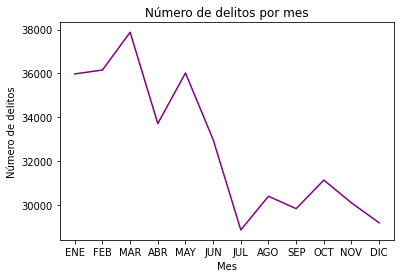

In [ ]:
# El siguiente código crea dos vectores: uno con el nombre de los meses y otro con el número de delitos
# cometidos en cada mes, y después los grafica.
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
         'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
delitos_por_mes = []
for mes in meses:
  delitos_por_mes.append(df_mes.at[mes, 'ao_hechos'])
meses = ['ENE', 'FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEP', 'OCT', 'NOV', 'DIC']
plt.title('Número de delitos por mes')
plt.xlabel('Mes')
plt.ylabel('Número de delitos')
plt.plot(meses, delitos_por_mes, color='purple')

*R: Es evidente que la mayoría de los crímenes ocurre en la primer mitad del año.*

8) ¿Cuales son los delitos que más caracterizan a cada alcaldía? Es decir, delitos que
suceden con mayor frecuencia en una alcaldía y con menor frecuencia en las demás.

In [ ]:
# Se cuentan los delitos de cada alcaldía y los data frames resultantes se agregan a una lista.
dfs = []
for alcaldia in alcaldias:
  dfs.append(df.where(df['alcaldia_hechos'] == alcaldia).groupby('delito').count())

# Se calculan los ratios entre el número de ocurrencias de cada delito en cada alcaldía
# y el número de ocurrencias total de ese delito.
# Si una alcaldía posee el ratio más alto de un delito, dicho delito se considera característico de esa alcaldía.
ratios = []
for dfk in dfs:
  ratios_delito = []
  for delito in delitos:
    try:
      ratios_delito.append(dfk.at[delito, 'mes_hechos'] / df_delitos.at[delito, 'mes_hechos'])
    except:
      ratios_delito.append(0)
  ratios.append(ratios_delito)

In [ ]:
# Se crea un data frame con los ratios delictivos de cada alcaldía.
data_ratios = {}
i = 0
for alcaldia in alcaldias:
  data_ratios.update({alcaldia: ratios[i]})
  i += 1
df_ratios = pd.DataFrame(data_ratios, index=delitos, columns=alcaldias)
df_ratios

alcaldia_hechos,ALVARO OBREGON,AZCAPOTZALCO,BENITO JUAREZ,COYOACAN,CUAJIMALPA DE MORELOS,CUAUHTEMOC,GUSTAVO A MADERO,IZTACALCO,IZTAPALAPA,LA MAGDALENA CONTRERAS,MIGUEL HIDALGO,MILPA ALTA,TLAHUAC,TLALPAN,VENUSTIANO CARRANZA,XOCHIMILCO
delito,,,,,,,,,,,,,,,,
ABANDONO DE PERSONA,0.050746,0.053731,0.044776,0.086567,0.011940,0.197015,0.134328,0.056716,0.158209,0.008955,0.035821,0.017910,0.023881,0.038806,0.026866,0.053731
ABORTO,0.049180,0.024590,0.032787,0.032787,0.008197,0.073770,0.196721,0.040984,0.270492,0.024590,0.049180,0.000000,0.024590,0.049180,0.098361,0.024590
ABUSO DE AUTORIDAD,0.034221,0.037389,0.047529,0.043726,0.009506,0.309252,0.114068,0.041825,0.164766,0.009506,0.058302,0.004436,0.015209,0.021546,0.065272,0.023447
ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA,0.063212,0.044560,0.069430,0.059067,0.010363,0.227979,0.088083,0.049741,0.154404,0.017617,0.054922,0.009326,0.017617,0.043523,0.074611,0.015544
ABUSO DE CONFIANZA,0.040703,0.037091,0.101879,0.079480,0.013247,0.151493,0.153661,0.052505,0.118256,0.005780,0.057803,0.006021,0.034923,0.045039,0.066233,0.035886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIOLACION EQUIPARADA Y ROBO DE VEHICULO,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333
VIOLACION TUMULTUARIA,0.031250,0.031250,0.093750,0.062500,0.000000,0.250000,0.062500,0.062500,0.187500,0.031250,0.000000,0.031250,0.031250,0.000000,0.062500,0.062500
VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Se determinan las alcaldías con el mayor ratio para cada delito.
df_ratios['ratio_mayor'] = df_ratios.idxmax(axis=1)
df_ratios

alcaldia_hechos,ALVARO OBREGON,AZCAPOTZALCO,BENITO JUAREZ,COYOACAN,CUAJIMALPA DE MORELOS,CUAUHTEMOC,GUSTAVO A MADERO,IZTACALCO,IZTAPALAPA,LA MAGDALENA CONTRERAS,MIGUEL HIDALGO,MILPA ALTA,TLAHUAC,TLALPAN,VENUSTIANO CARRANZA,XOCHIMILCO,ratio_mayor
delito,,,,,,,,,,,,,,,,,
ABANDONO DE PERSONA,0.050746,0.053731,0.044776,0.086567,0.011940,0.197015,0.134328,0.056716,0.158209,0.008955,0.035821,0.017910,0.023881,0.038806,0.026866,0.053731,CUAUHTEMOC
ABORTO,0.049180,0.024590,0.032787,0.032787,0.008197,0.073770,0.196721,0.040984,0.270492,0.024590,0.049180,0.000000,0.024590,0.049180,0.098361,0.024590,IZTAPALAPA
ABUSO DE AUTORIDAD,0.034221,0.037389,0.047529,0.043726,0.009506,0.309252,0.114068,0.041825,0.164766,0.009506,0.058302,0.004436,0.015209,0.021546,0.065272,0.023447,CUAUHTEMOC
ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA,0.063212,0.044560,0.069430,0.059067,0.010363,0.227979,0.088083,0.049741,0.154404,0.017617,0.054922,0.009326,0.017617,0.043523,0.074611,0.015544,CUAUHTEMOC
ABUSO DE CONFIANZA,0.040703,0.037091,0.101879,0.079480,0.013247,0.151493,0.153661,0.052505,0.118256,0.005780,0.057803,0.006021,0.034923,0.045039,0.066233,0.035886,GUSTAVO A MADERO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIOLACION EQUIPARADA Y ROBO DE VEHICULO,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,ALVARO OBREGON
VIOLACION TUMULTUARIA,0.031250,0.031250,0.093750,0.062500,0.000000,0.250000,0.062500,0.062500,0.187500,0.031250,0.000000,0.031250,0.031250,0.000000,0.062500,0.062500,CUAUHTEMOC
VIOLACION TUMULTUARIA EQUIPARADA POR CONOCIDO,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,AZCAPOTZALCO


In [ ]:
# Se imprimen los delitos característicos de cada alcaldía.
for alcaldia in alcaldias:
  print(alcaldia)
  for delito in delitos:
    if df_ratios.at[delito, 'ratio_mayor'] == alcaldia:
      print('   ', delito)

ALVARO OBREGON
    ATAQUE A LAS VIAS DE COMUNICACION (DAÃ‘O A VIAS O MEDIOS DE TRANSPORTE)
    EXPLOTACIÓN DE MENOR O DISCAPACITADO
    EXPLOTACIÓN LABORAL DE MENORES, PERSONAS CON DISCAPACIDAD FÍSICA O MENTAL Y ADULTOS MAYORES
    LEY FEDERAL DE ARMAS DE FUEGO Y EXPLOSIVOS
    ROBO A PASAJERO / CONDUCTOR DE VEHICULO CON VIOLENCIA
    ROBO A SUCURSAL BANCARIA DENTRO DE  TIENDAS DE AUTOSERVICIO CON VIOLENCIA
    ROBO A TRANSEUNTE EN TERMINAL DE PASAJEROS CON VIOLENCIA
    SECUESTRO EXPRESS (PARA COMETER ROBO O EXTORSIÓN)
    TENTATIVA DE VIOLACION
    USO INDEBIDO DE ATRIBUCIONES Y FACULTADES
    VIOLACION EQUIPARADA POR CONOCIDO
    VIOLACION EQUIPARADA Y ROBO DE VEHICULO
    VIOLACION Y ROBO DE VEHICULO
AZCAPOTZALCO
    ATAQUE A LAS VIAS GENERALES DE COMUNICACIÃ“N
    CONTRA EL ESTADO CIVIL
    OTROS DELITOS
    PERSONAS EXTRAVIADAS
    ROBO A PASAJERO EN AUTOBUS FORANEO SIN VIOLENCIA
    ROBO A TRANSEUNTE EN PARQUES Y MERCADOS CON VIOLENCIA
    ROBO DE CONTENEDORES DE TRAILERS S/V
  

9) Calcula el número de homicidios dolosos por cada 100 mil habitantes anual para cada
Área Geoestadística Básica (AGEB) del INEGI. (hint: no importa que el dato de
población no esté actualizado).

In [ ]:
# Difícil de determinar con los datos que se cuenta, se proponen alcaldías en lugar de AGEBs. 
# Se calcula el número de homicidios dolosos por cada 100 mil habitantes anual (2019) para cada alcaldía.
df_homicidios = df.where(df['categoria_delito'] == 'HOMICIDIO DOLOSO').dropna()
df_homicidios = df_homicidios.where(df_homicidios['ao_hechos'] == 2019).dropna()
df_homicidios = df_homicidios.groupby('alcaldia_hechos').count()
df_homicidios

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
alcaldia_hechos,,,,,,,,,,,,,,,,,
ALVARO OBREGON,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49
AZCAPOTZALCO,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
BENITO JUAREZ,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
COYOACAN,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
CUAJIMALPA DE MORELOS,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
CUAUHTEMOC,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69
GUSTAVO A MADERO,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139
IZTACALCO,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
IZTAPALAPA,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159


In [ ]:
# Número de habitantes por alcaldía en 2015 según el INEGI.
  # Fuente: http://cuentame.inegi.org.mx/monografias/informacion/df/territorio/div_municipal.aspx?tema=me&e=09
df_homicidios['poblacion'] = pd.Series([749982, 400161, 417416, 608479, 199224, 532553, 1164477, 
                              390348, 1827868, 243886, 364439, 137927, 361593, 677104, 427263, 415933]).values
df_homicidios['tasa_de_homicidios'] = (df_homicidios['ao_hechos'] / df_homicidios['poblacion']) * 100000
df_homicidios

,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,ao_inicio,mes_inicio,fecha_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint,poblacion,tasa_de_homicidios
alcaldia_hechos,,,,,,,,,,,,,,,,,,,
ALVARO OBREGON,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,749982,6.533490
AZCAPOTZALCO,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,400161,6.247485
BENITO JUAREZ,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,417416,2.874830
COYOACAN,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,608479,5.259015
CUAJIMALPA DE MORELOS,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,199224,2.007790
CUAUHTEMOC,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69,532553,12.956457
GUSTAVO A MADERO,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,1164477,11.936689
IZTACALCO,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,390348,7.941632
IZTAPALAPA,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,159,1827868,8.698659


*R: En la columna 'tasa_de_homicidios' puede consultarse el número de homicidios dolosos por cada cien mil habitantes anual de las alcaldías.*

10) ¿Cómo diseñarías un indicador que midiera el nivel “inseguridad”? Diséñalo al nivel de
desagregación que te parezca más adecuado (ej. manzana, calle, AGEB, etc.).

*R: Establecería las colonias como nivel de desagregación. Después le daría un peso a cada tipo de delito según su gravedad. El número de inicidencias de cada tipo de delito se multiplicaría por su respectivo peso; la suma de las incidencias ponderadas determinaría el nivel de inseguridad de una colonia. Además, podría tomarse una colonia de referencia —quizá la más peligrosa— para obtener una medida más significativa de la inseguridad de una colonia de prueba. El nivel de inseguridad de la colonia de prueba se dividiría entre el nivel de inseguridad de la colonia de referencia, y así el nivel de inseguridad de la primer colonia podría expresarse en términos porcentuales respecto a la segunda.*

11) Con alguna de las medidas de crimen que calculaste en los incisos anteriores, encuentra
patrones de concentración geográfica de delitos (hint: puedes usar algoritmos de
Machine Learning no supervisados).


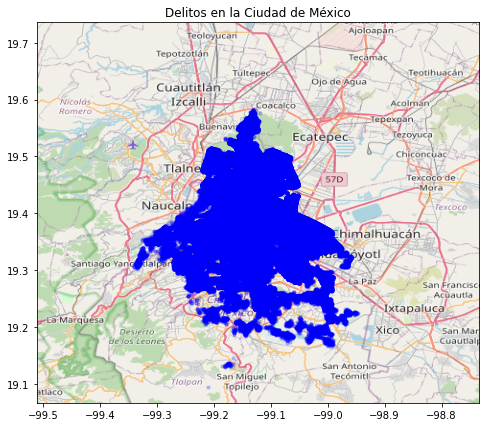

In [ ]:
# Se carga la imagen del mapa de la Ciudad de México.
imagen_mapa = plt.imread('map_cdmx.png')

# Límites del mapa.
long_min = -99.5114
long_max = -98.7341
lat_min = 19.0673
lat_max = 19.7357

bbox = (long_min, long_max, lat_min, lat_max)

# Se imprime mapa con los delitos señalados como puntos azules.
fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(df.longitud, df.latitud, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Delitos en la Ciudad de México')
ax.set_xlim(bbox[0], bbox[1])
ax.set_ylim(bbox[2], bbox[3])
ax.imshow(imagen_mapa, zorder=0, extent=bbox, aspect='equal')

11.a) ¿Qué caracteriza a cada punto de concentración de delitos y qué tienen en
común?

*R: Los delitos parecen estar distribuidos por toda la Ciudad de México en la misma medida que la densidad poblacional.*

12) Toma los delitos clasificados como “Robo a pasajero a bordo de transporte público con
y sin violencia”. ¿Cuáles son las ruta de transporte público donde más ocurren estos
delitos?

*R: Es difícil de determinar con los datos que se cuenta. Podrían usarse las calles donde ocurrieron los delitos para estimar la ruta de transporte público; sin embargo, muchas rutas de transporte pueden pasar por las mismas calles, y eso dificulta la decisión. Sin embargo, acorde a la Secretaría de Seguridad Ciudadana, y en un artículo de Excélsior, las rutas más peligrosas de la Ciudad de México se muestran en las siguientes imágenes.*

*Fuente: https://www.excelsior.com.mx/comunidad/combaten-robos-en-las-rutas-mas-peligrosas-de-la-ciudad-de-mexico/1343077*

![Rutas](https://cdn2.excelsior.com.mx/media/inside-the-note/pictures/2019/10/21/36.jpg)

![Rutas](https://cdn2.excelsior.com.mx/media/inside-the-note/pictures/2019/10/21/25.jpg)